In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error

C:\Users\yjs63\AppData\Local\Temp\ipykernel_3812\1135486040.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('C:/취업준비/스파르타코딩/머신러닝(주피터노트북)/TeamPJT-3/train_train.csv')
type(df['timestamp'][0])
import datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day
df['dayofweek'] = df['timestamp'].dt.dayofweek
df['ttimestampp'] = df['year']+df['month']
df['Index'] = df.index

df

,ID,timestamp,item,corporation,location,supply(kg),price(??kg),year,month,day,dayofweek,ttimestampp,Index
0,TG_A_J_20220131,2022-01-31,TG,A,J,0.0,0,2022,1,31,0,2023,0
1,TG_A_S_20220131,2022-01-31,TG,A,S,0.0,0,2022,1,31,0,2023,1
2,TG_B_J_20220131,2022-01-31,TG,B,J,0.0,0,2022,1,31,0,2023,2
3,TG_B_S_20220131,2022-01-31,TG,B,S,0.0,0,2022,1,31,0,2023,3
4,TG_C_J_20220131,2022-01-31,TG,C,J,0.0,0,2022,1,31,0,2023,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43948,BC_D_J_20190101,2019-01-01,BC,D,J,0.0,0,2019,1,1,1,2020,43948
43949,BC_E_J_20190101,2019-01-01,BC,E,J,0.0,0,2019,1,1,1,2020,43949
43950,BC_E_S_20190101,2019-01-01,BC,E,S,0.0,0,2019,1,1,1,2020,43950
43951,CB_F_J_20190101,2019-01-01,CB,F,J,0.0,0,2019,1,1,1,2020,43951


In [3]:
CB_data = df[df['item'] == 'CB']
CB_data

,ID,timestamp,item,corporation,location,supply(kg),price(??kg),year,month,day,dayofweek,ttimestampp,Index
17,CB_A_J_20220131,2022-01-31,CB,A,J,0.0,0,2022,1,31,0,2023,17
18,CB_A_S_20220131,2022-01-31,CB,A,S,0.0,0,2022,1,31,0,2023,18
19,CB_D_J_20220131,2022-01-31,CB,D,J,0.0,0,2022,1,31,0,2023,19
20,CB_E_J_20220131,2022-01-31,CB,E,J,0.0,0,2022,1,31,0,2023,20
37,CB_F_J_20220131,2022-01-31,CB,F,J,0.0,0,2022,1,31,0,2023,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43931,CB_A_J_20190101,2019-01-01,CB,A,J,0.0,0,2019,1,1,1,2020,43931
43932,CB_A_S_20190101,2019-01-01,CB,A,S,0.0,0,2019,1,1,1,2020,43932
43933,CB_D_J_20190101,2019-01-01,CB,D,J,0.0,0,2019,1,1,1,2020,43933
43934,CB_E_J_20190101,2019-01-01,CB,E,J,0.0,0,2019,1,1,1,2020,43934


<Axes: xlabel='supply(kg)', ylabel='price(??kg)'>

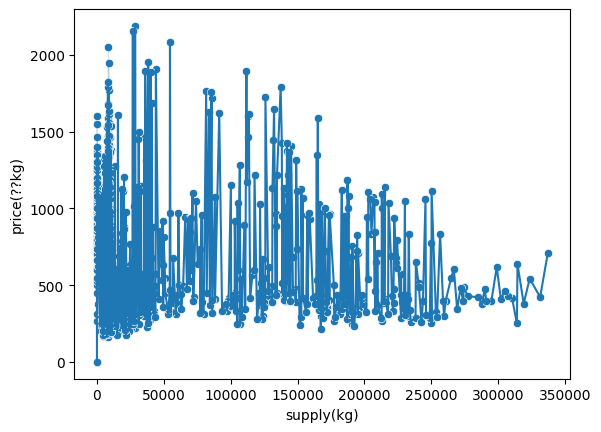

In [4]:
#CB_data.plot()
plt.show()
sns.scatterplot( data = CB_data, x = 'supply(kg)' , y = 'price(??kg)')
sns.lineplot( data = CB_data, x = 'supply(kg)' , y = 'price(??kg)')
#plt.figure(figsize=(40,20))

0.0029400608347521584 110.40827548346445
110.4112155442992


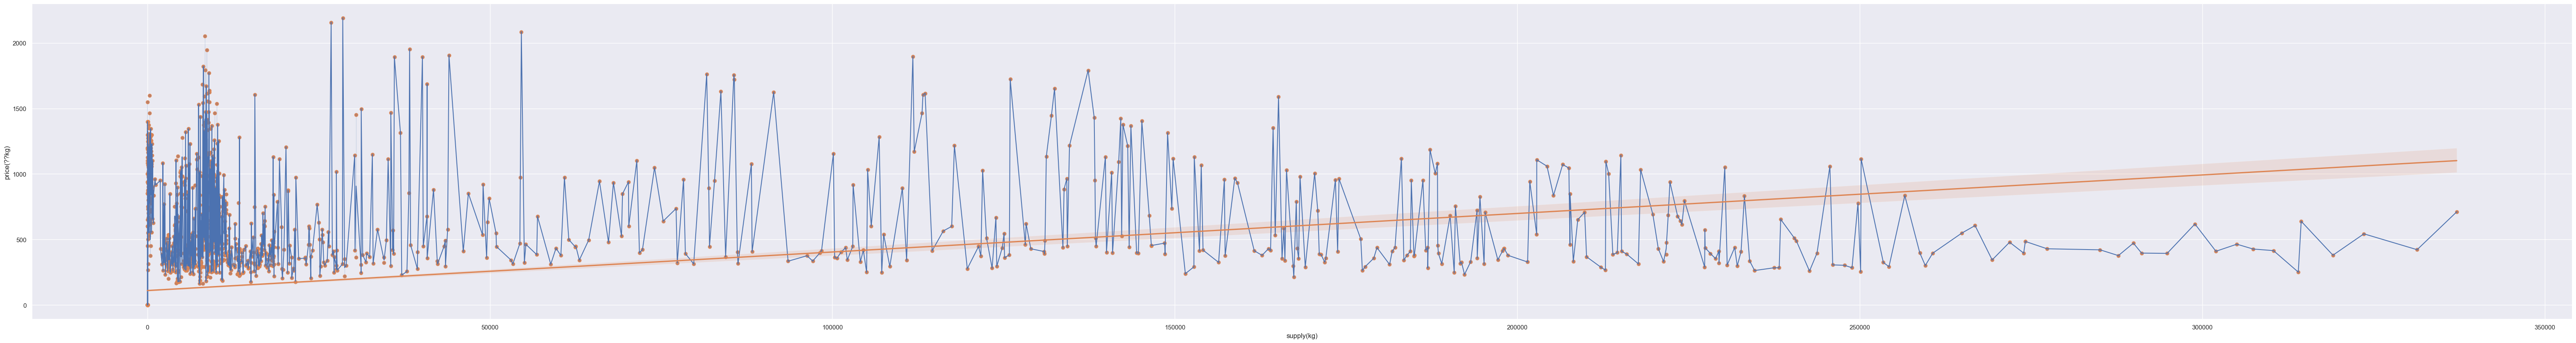

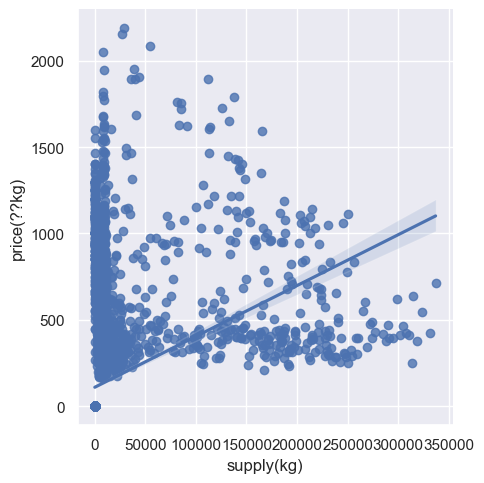

In [5]:
sns.set(rc={"figure.figsize":(80, 10)}) #width=3, #height=4
sns.scatterplot( data = CB_data, x = 'supply(kg)' , y = 'price(??kg)')
sns.lineplot( data = CB_data, x = 'supply(kg)' , y = 'price(??kg)')
sns.regplot( data = CB_data, x = 'supply(kg)' , y = 'price(??kg)')
sns.lmplot( data = CB_data, x = 'supply(kg)' , y = 'price(??kg)')
z=np.polyfit(CB_data['supply(kg)'], CB_data['price(??kg)'], 1)
f=np.poly1d(z)
print(z[0], z[1])
print(f(1))

In [6]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
type(model_lr)


sklearn.linear_model._base.LinearRegression

In [7]:
prsu_df = CB_data[['supply(kg)', 'price(??kg)']]
model_lr.fit(CB_data[['supply(kg)']], CB_data['price(??kg)'])


LinearRegression()

In [8]:
y_pred = model_lr.predict(CB_data[['supply(kg)']])


In [9]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(CB_data['price(??kg)'], y_pred)


190.95418978979913

In [10]:
from sklearn.metrics import mean_squared_error 
mean_squared_error(CB_data['price(??kg)'], y_pred)

90664.98591489099

In [11]:
from sklearn.metrics import mean_squared_error 
MSE = mean_squared_error(CB_data['price(??kg)'], y_pred) 

In [12]:
from sklearn.metrics import mean_squared_error 
MSE = mean_squared_error(CB_data['price(??kg)'], y_pred) 
MSE ** 0.5

301.10627013546394

In [13]:
from sklearn.metrics import mean_squared_log_error
mean_squared_log_error(CB_data['price(??kg)'], y_pred)

17.857974054581554

In [14]:
print(model_lr.intercept_)
r2_score(CB_data['price(??kg)'], y_pred)

110.40827548346135


0.13677436807369048